# Regression Plot

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
experience=[1,2,3,4,5,6,7,8,9,10]
salary    =[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

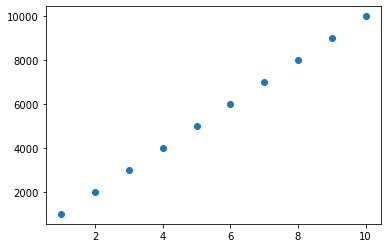

In [4]:
plt.scatter(x=experience,y=salary)

In [5]:
import statsmodels.formula.api as smf

In [18]:
data=pd.DataFrame(data=[experience,salary]).T
data.columns=[['experience','salary']]
data

,experience,salary
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000
5,6,6000
6,7,7000
7,8,8000
8,9,9000
9,10,10000


In [13]:
data.columns

RangeIndex(start=0, stop=2, step=1)

In [20]:
model=smf.ols(formula='salary~experience',data=data).fit()
model

# Hypothesis Formula

In [21]:
model.pvalues

Intercept      6.601453e-01
experience    4.940232e-124
dtype: float64

# ho : experience and salary are not linearly related
# ha: experience and salary are linearly related

**level of significance is 5%**

**so from the probability value the significance is less than 5% so it reject the null hypothesis.**

# Chi Squared test

In [22]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [25]:
tips_data=sns.load_dataset('tips')
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Ho: there is no significant association between sex and smoker
# Ha:there is  significant association between sex and smoker

In [37]:
table=pd.crosstab(index=tips_data['sex'], columns=tips_data['smoker'], #margins=True)
table

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [39]:
from scipy import stats

In [38]:
chi_square_test_val,pval,dof,expected_table=stats.chi2_contingency(observed=table)

In [40]:
print('*******************************************')
print('Chi-square Test  : ',chi_square_test_val)
print('P-value          : ',pval)
print('Degree of Freedom: ',dof)
print('Expected Table   :\n',expected_table)
print('*******************************************')

*******************************************
Chi-square Test  :  0.001934818536627623
P-value          :  0.9999995323613375
Degree of Freedom:  4
Expected Table   :
 [[ 59.84016393  97.15983607 157.        ]
 [ 33.15983607  53.84016393  87.        ]
 [ 93.         151.         244.        ]]
*******************************************


# significant association =10%

In [ ]:
#we can say that  we cannot reject the null hypothesis and claim that there is no significant association between two groups

# T -test

# 1 Sample T Test
# 2 Sample T Test
# ANOVA
# Paired T Test

In [ ]:
# 1.sample T test

In [41]:
ages=[20,40,50,40,30,50,40,30,45,60,40,18,30,60,40,30,50,40,50,60,30,27,70,48,60,50,25,45,40,40]
len(ages)

30

In [42]:
import numpy as np

In [43]:
np.mean(ages)

41.93333333333333

In [44]:
age_1=np.random.choice(a=ages,size=5)
age_1

array([60, 60, 60, 40, 50])

In [45]:
np.mean(age_1)

54.0

In [51]:
t_test,p_val=stats.ttest_1samp(a = age_1,popmean =40)
t_test,p_val

(3.5, 0.02489616346022275)

In [ ]:
# significant association is 5% 

In [49]:
# one tailed test
pval/2

0.49999976618066877

In [ ]:
# 2 sample t test

In [52]:
covishield_reaction_time = [48,50,24,24,24,50]
covaxin_reaction_time    = [0,0,2,0,2,0]

In [54]:
np.mean(covishield_reaction_time)

36.666666666666664

In [55]:
np.mean(covaxin_reaction_time)

0.6666666666666666

In [56]:
stats.ttest_ind( a=covishield_reaction_time, b=covaxin_reaction_time)

Ttest_indResult(statistic=6.328897617669689, pvalue=8.582002062447786e-05)

In [ ]:
# paired t test

In [57]:
preweightloss_program  = [110,100,120,105,100,110,99,120,110,100]
postweightloss_program = [80,78,90,89,88,90,80,80,85,70]

In [58]:
np.mean(preweightloss_program)

107.4

In [59]:
np.mean(postweightloss_program)

83.0

In [60]:
stats.ttest_rel(a=preweightloss_program,b=postweightloss_program)

Ttest_relResult(statistic=9.323516978661818, pvalue=6.389963390670724e-06)

In [ ]:
# significant association is 5% = claim that we can reject the null hypothesis